Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **TITLE**
**Name** | Vllamor, Kurt Russel A
**Section** | CPE32S3
**Date Performed**: | 02-21-25
**Date Submitted**: | 02-21-25
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to introduce students to openCV's APIs for Hough Transform.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize openCV for circle and line detection.
* Analyze the use of hough Line and Circle function for finding objects in an image.

## 3. Procedures and Outputs

Detecting edges and contours are not only common and important tasks, they also constitute the basis for other complex operations. Lines and shape detection go hand in hand with edge and contour detection, so let's examine how OpenCV implements these.

### Line Detection

The theory behind lines and shape detection has its foundation in a technique called the Hough transform, invented by Richard Duda and Peter Hart, who extended (generalized) the work done by Paul Hough in the early 1960s.

Let's take a look at OpenCV's API for the Hough transforms.

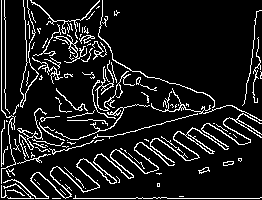

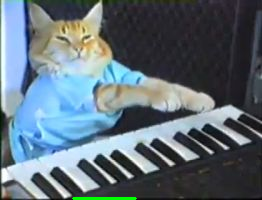

In [ ]:
# Image source: https://en.wikipedia.org/wiki/Keyboard_Cat

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('/content/keyboard_cat.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

# cv2_imshow(edges)
cv2_imshow(edges)
cv2_imshow(img)

The crucial point of this simple script —aside from the HoughLines function call— is the setting of minimum line length (shorter lines will be discarded) and the maximum line gap, which is the maximum size of a gap in a line before the two segments start being considered as separate lines.

Also note that the HoughLines function takes a single channel binary image, processed through the Canny edge detection filter. Canny is not a strict requirement, however; an image that's been denoised and only represents edges, is the ideal source for a Hough transform, so you will find this to be a common practice.

The parameters of HoughLinesP are as follows:
- The image we want to process.
- The geometrical representations of the lines, rho and theta, which are usually 1 and np.pi/180.
- The threshold, which represents the threshold below which a line is discarded. The Hough transform works with a system of bins and votes, with each bin representing a line, so any line with a minimum of the <threshold> votes is retained, the rest discarded.
- MinLineLength and MaxLineGap, which we mentioned previously

**Questions:**

1. Which line of code is responsible for setting the minimum line length?
2. What is the mathematical formula for Hough transform and explain how it finds lines.

- **The minLineLength variable is responsible to the minimum line length**
- **The Hough transormation formula is:**

$$
x cos\theta + ysin \theta = r
$$

- **were the hough transform calculates the curves in the parameter space and save it in aa array called the accumulator. This is done by finding the curves that tha parameter values intersects to by iterating through all possible values. Using the accumulator, it finds the peak n that accumulator that will show the images lines and circles**

### Circle Detection

OpenCV also has a function for detecting circles, called HoughCircles. It works in a very similar fashion to HoughLines, but where minLineLength and maxLineGap were the parameters to discard or retain lines, HoughCircles has a minimum distance between circles' centers, minimum, and maximum radius of the circles. Here's the obligatory example:

Before going into the sample code, check first: **What is the HoughCircles function and what are its parameters?**

- **As for the documentation in [OpenCv](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d)**

```
cv.HoughCircles(
  image,
  method,
  dp,
  minDist[
          ,circles[
            ,param1
            [, param2[
              , minRadius[
                , maxRadius]]]]]) -> 	circles
```

**HoughCircles is a function that finds circles in a grayscale image using a modification of the Hough transform.**

- The parameters


```
image	8-bit, single-channel, grayscale input image.
circles	Output vector of found circles. Each vector is encoded as 3 or 4 element floating-point vector
or
.
method	Detection method, see HoughModes. The available methods are HOUGH_GRADIENT and HOUGH_GRADIENT_ALT.
dp	Inverse ratio of the accumulator resolution to the image resolution. For example, if dp=1 , the accumulator has the same resolution as the input image. If dp=2 , the accumulator has half as big width and height. For HOUGH_GRADIENT_ALT the recommended value is dp=1.5, unless some small very circles need to be detected.
minDist	Minimum distance between the centers of the detected circles. If the parameter is too small, multiple neighbor circles may be falsely detected in addition to a true one. If it is too large, some circles may be missed.
param1	First method-specific parameter. In case of HOUGH_GRADIENT and HOUGH_GRADIENT_ALT, it is the higher threshold of the two passed to the Canny edge detector (the lower one is twice smaller). Note that HOUGH_GRADIENT_ALT uses Scharr algorithm to compute image derivatives, so the threshold value should normally be higher, such as 300 or normally exposed and contrasty images.
param2	Second method-specific parameter. In case of HOUGH_GRADIENT, it is the accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected. Circles, corresponding to the larger accumulator values, will be returned first. In the case of HOUGH_GRADIENT_ALT algorithm, this is the circle "perfectness" measure. The closer it to 1, the better shaped circles algorithm selects. In most cases 0.9 should be fine. If you want get better detection of small circles, you may decrease it to 0.85, 0.8 or even less. But then also try to limit the search range [minRadius, maxRadius] to avoid many false circles.
minRadius	Minimum circle radius.
maxRadius	Maximum circle radius. If <= 0, uses the maximum image dimension. If < 0, HOUGH_GRADIENT returns centers without finding the radius. HOUGH_GRADIENT_ALT always computes circle radiuse```



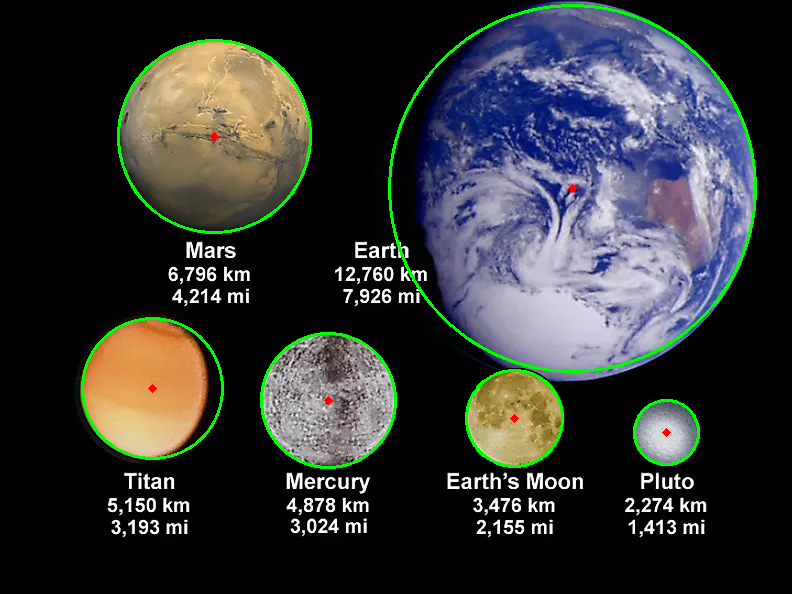

In [ ]:
import cv2
import numpy as np

# Our testing value
n = 21

planets = cv2.imread('/content/planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite(f"{n}-planets_circles.jpg", planets)
cv2_imshow(planets)

What happens to the code once you run **and the value of n is 5**?

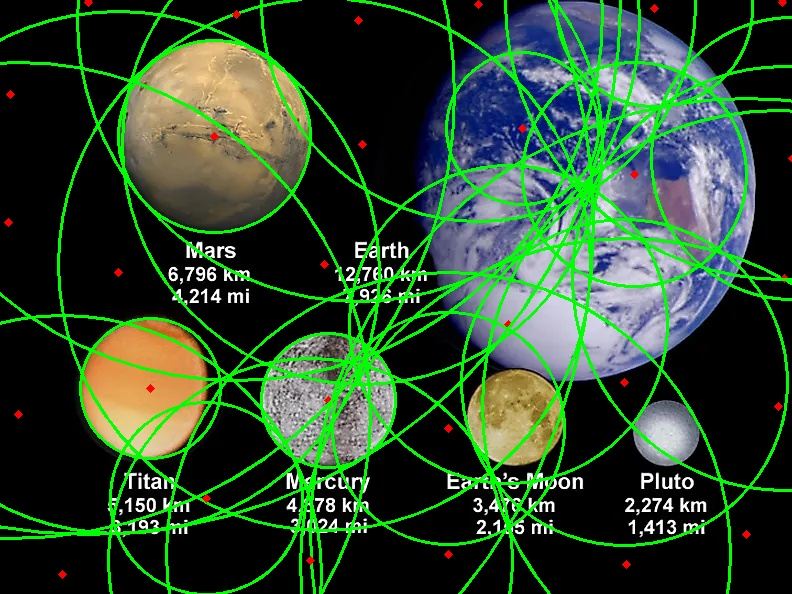

In [ ]:
five = cv2.imread('/content/5-planets_circles.jpg')
cv2_imshow(five)

Change the value to 9, **what happens to the image**?

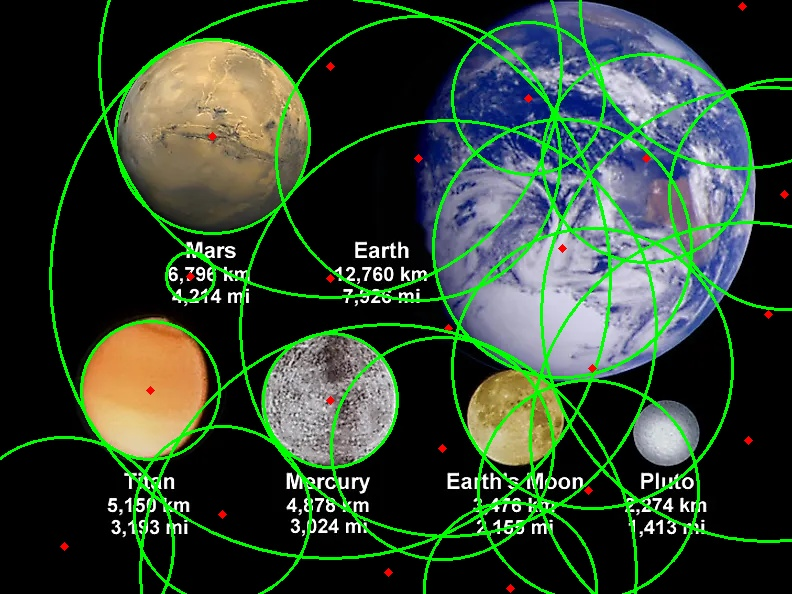

In [ ]:
nine = cv2.imread('/content/9-planets_circles.jpg')
cv2_imshow(nine)

Lastly, change the value to 15, **what can you say about the resulting image?**

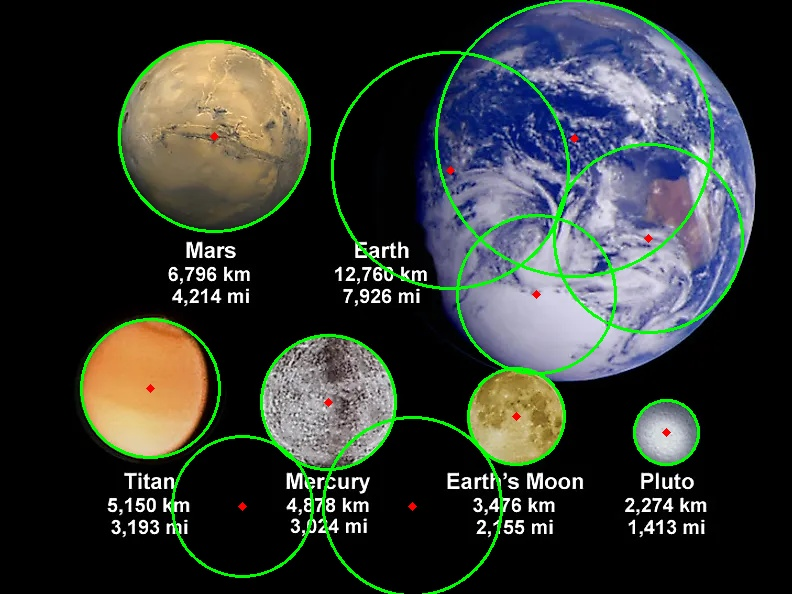

In [ ]:
fifteen = cv2.imread('/content/15-planets_circles.jpg')
cv2_imshow(fifteen)

Provide an analysis of the output so far. How does the code help the changes in the resulting image?

- *n=5* image is very messy and it doesn't properly pinpoint the circles in the images. There ae some middle points that is point somewhere that doesn't have anything on it
- *n=9* lessen the numbers of unknown middle points somewhere
- the *n=15* starts to show use the exact circle detected in the planets in the picture except the earth  where there are 4 middle points.

## 4. Supplementary Activity

The attached image contains coins used in the Philippines.

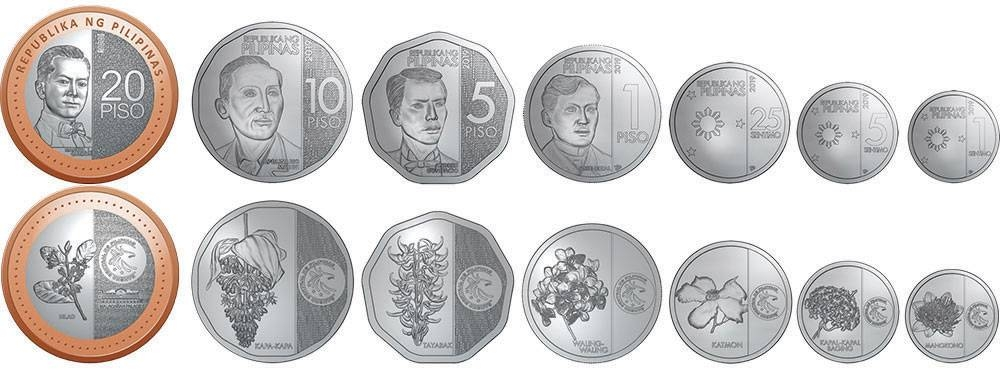

Your job is to count the amount of coins (denomation not included, no sum of prices; just the amount of coins present) through either line detection or circle detection.

- Create a function using line detection and pass this image as parameter, what is the output? Can you use houghlines to count circles?
- Create a function using circle detection and pass this image as parameter, show the output? Can you use houghcircles to count the circles?

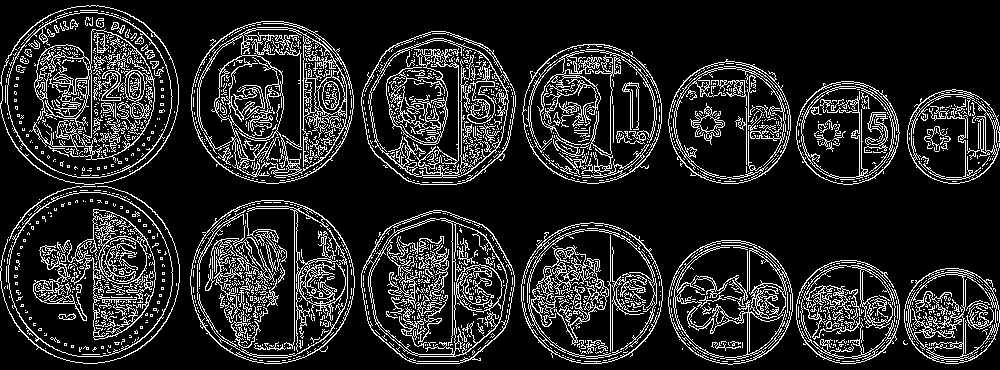

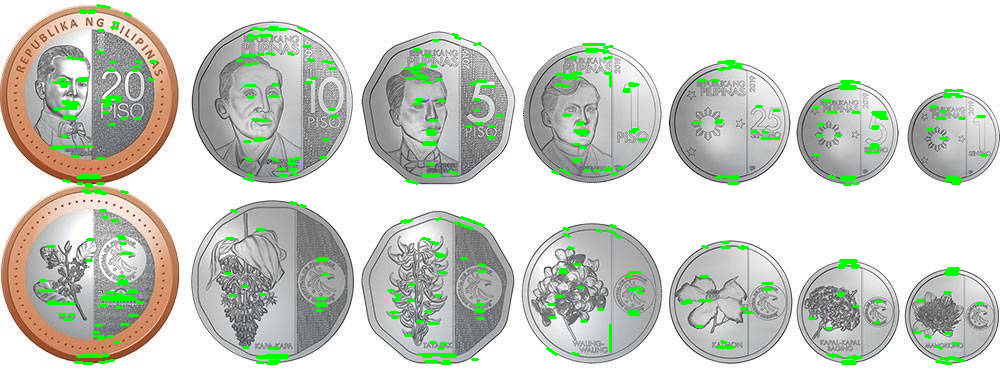

COINS COUNT: 454


In [55]:
# for HoughLines
def houLi(image,  minLineLength = 50, maxLineGap = 5):
  img = cv2.imread(image)

  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

  edges = cv2.Canny(gray,50,120)

  lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength, maxLineGap)

  img_lines = img.copy()
  if lines is not None:
    for line in lines:
      x1, y1, x2, y2 = line[0]
      cv2.line(img_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

  cv2_imshow(edges)
  cv2_imshow(img_lines)
  print(f"COINS COUNT: {len(lines)}")

houLi('/content/coins.jpg')

- In counting the coins using lines That is the ouput of the Hough Lines function, you didn't get much out of it. This because the lines that detected are affected by the noises surrounding it. If you want to count the coins using hough lines, find another function since this doesn't give you your desired output

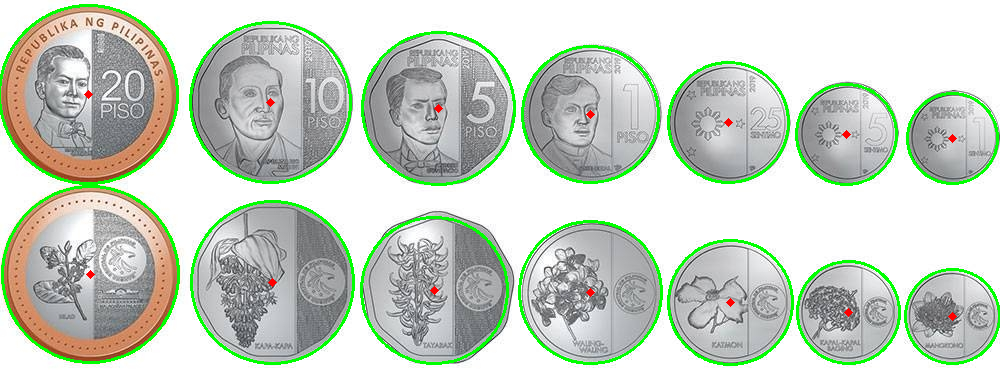

COINS COUNT: 14


In [54]:
# For HoughCircles

def houCi(image, n):
  imag = cv2.imread(image)

  gray_img = cv2.cvtColor(imag, cv2.COLOR_BGR2GRAY)

  img = cv2.medianBlur(gray_img, n)

  cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

  circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,
                              minDist=40,
                              param1=80,
                              param2=30,
                              minRadius=30,
                              maxRadius=100)

  circles = np.uint16(np.around(circles))

  for i in circles[0,:]:
    cv2.circle(imag,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(imag,(i[0],i[1]),2,(0,0,255),3)

  cv2_imshow(imag)
  print(f"COINS COUNT: {len(circles[0])}")

houCi('/content/coins.jpg', n=21)

- Using the hough Circle funstion, we can see that the coins are counted properly. We can say that this function is useful in counting coins like this

## 5. Summary, Conclusions and Lessons Learned

In this activity Ive learne tio utilkize the Hough transformation to successfully find lines and circles in the image. This can be done by feeding the image dato to either HoughLines or HoughCircle depending you goal is. For formality, Lines are more dominant in detecting shape of the certain object without curves while Hugh circles compensates to that. For the supplementary actiity, the Hugh circle are more preferred since coins shape is circle.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*